# Tutorial 4
# Fuzzy C-means Clustering

Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering where every point is assigned a crisp, exact label.

Fuzzy c-means clustering is accomplished via skfuzzy.cmeans, and the output from this function can be repurposed to classify new data according to the calculated clusters (also known as prediction) via skfuzzy.cmeans_predict

In [1]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
# Install this library before starting Fuzzy c-means clustering
!pip install fuzzy-c-means

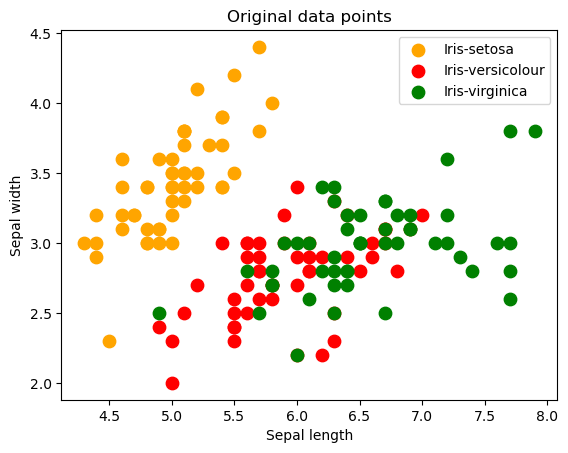

In [5]:
# import the libraries for Fuzzy C-Means Clusterings
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris

# Load the iris data set
iris = load_iris()

# Store data columns (sepal length, sepal width, petal length, petal width) into an array X and target variable into an array y
X = iris['data']
y = iris['target']

# Plot the original data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 80, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Original data points')
plt.legend();

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 3)

# fit the fuzzy-c-means
fcm.fit(X)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = fcm.u.argmax(axis = 1)

In [9]:
print(fcm_centers,fcm_labels)

[[5.00396596 3.41408892 1.48281544 0.25354627]
 [6.77500978 3.05238185 5.64677998 2.05354596]
 [5.88893117 2.76106893 4.3639499  1.39731414]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


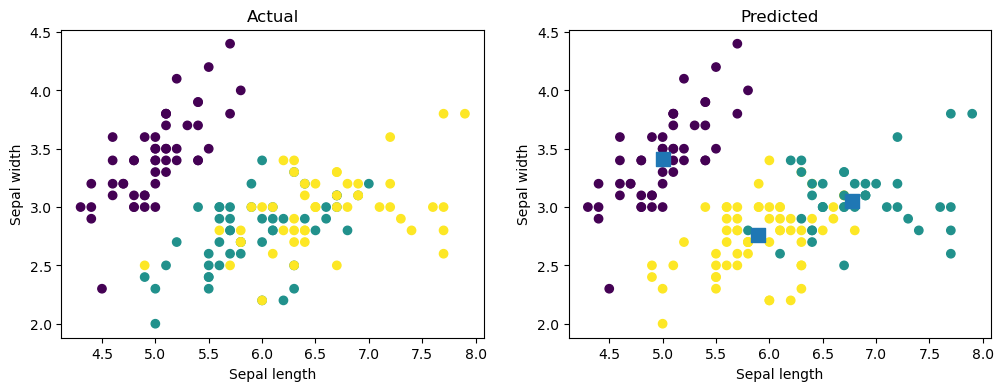

In [10]:
# plot result
f, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].scatter(X[:,0], X[:,1], c = y)
axes[1].scatter(X[:,0], X[:,1], c = fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker = "s", s = 100)

axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

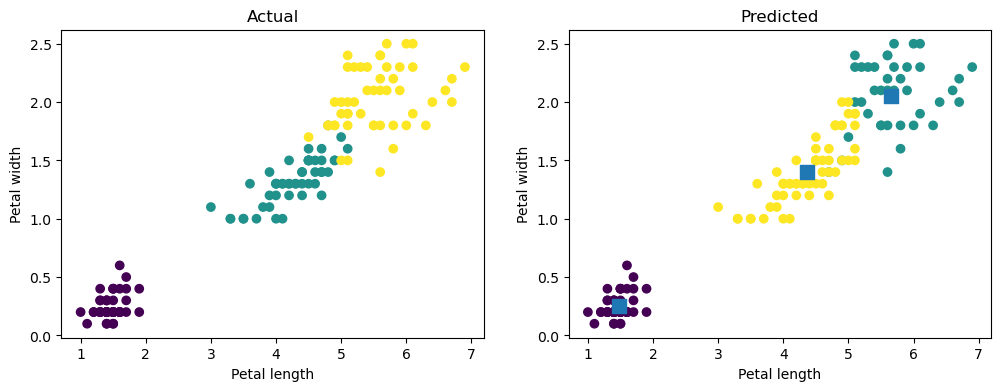

In [11]:
# plot result
f, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].scatter(X[:,2], X[:,3], c = y)
axes[1].scatter(X[:,2], X[:,3], c = fcm_labels)
axes[1].scatter(fcm_centers[:,2], fcm_centers[:,3], marker = "s", s = 100)
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

## Task 1: Perform Fuzzy C-means clustering on the dataset, 'Wholesale_customers_data.csv' for two columns, for example, 'Milk' and 'Grocery'.

In [12]:
df = pd.read_csv('Wholesale_customers_data.csv')

In [13]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [25]:
X = df.iloc[:, [3,4]].values

In [32]:
X

array([[ 9656,  7561],
       [ 9810,  9568],
       [ 8808,  7684],
       [ 1196,  4221],
       [ 5410,  7198],
       [ 8259,  5126],
       [ 3199,  6975],
       [ 4956,  9426],
       [ 3648,  6192],
       [11093, 18881],
       [ 5403, 12974],
       [ 1124,  4523],
       [12319, 11757],
       [ 6208, 14982],
       [ 9465, 12091],
       [ 1114,  3821],
       [ 8816, 12121],
       [ 6157,  2933],
       [ 6327, 10099],
       [ 2495,  9464],
       [ 4519,  4602],
       [  871,  2010],
       [ 1917,  4469],
       [36423, 22019],
       [ 9776, 13792],
       [ 4230,  7595],
       [  961,  2861],
       [  803,  3045],
       [20484, 25957],
       [ 2100,  2609],
       [ 3610, 11107],
       [ 4339,  3133],
       [ 1318,  2886],
       [ 4786,  7326],
       [ 1979,  2262],
       [ 5491, 11091],
       [ 4362,  5428],
       [10556, 12477],
       [15729, 16709],
       [  555,   902],
       [ 4332,  4757],
       [ 3065,  5956],
       [ 7555, 14961],
       [110

In [26]:
y = df.iloc[:, 7].values

In [28]:
# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 3)

# fit the fuzzy-c-means
fcm.fit(X)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = fcm.u.argmax(axis = 1)

In [31]:
print(fcm_centers)

[[25500.89681035 33672.84162282]
 [ 2591.76676104  3254.72700342]
 [ 8981.93463465 13678.22354776]]


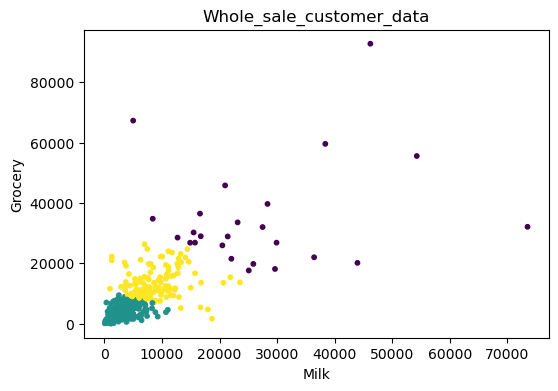

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:, 1], c=fcm_labels, s = 10)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker = "s", s = 10)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Whole_sale_customer_data');

In [37]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [41]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df)

In [43]:
df_scaled

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [45]:
X = df_scaled[:, [3,4]]

In [46]:
# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 2)

# fit the fuzzy-c-means
fcm.fit(X)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = fcm.u.argmax(axis = 1)

In [47]:
print(fcm_centers,fcm_labels)

[[0.15703018 0.19534598]
 [0.46600399 0.66862074]] [1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1]


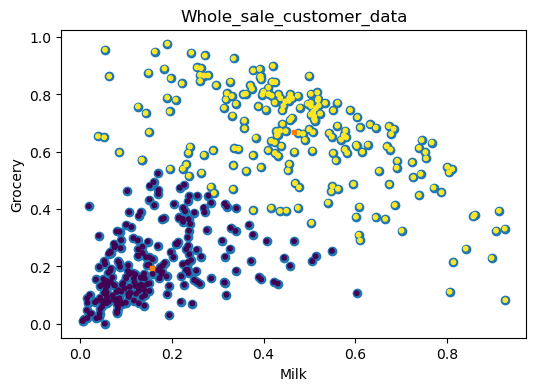

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(df_scaled[:,3], df_scaled[:,4])
plt.scatter(X[:,0], X[:, 1], c=fcm_labels, s = 10)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker = "s", s = 10)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Whole_sale_customer_data');

## References 
Practical Machine Learning for Data Analysis Using Python, Abdulhamit Subasi, ISBN: 978-0-12-821379-7, Jun 07, 2020, Elsevier Science & Technology.